#Research Proposal
**Experimental A/B Design Testing using Power Utility Operational Data in US**

The dataset I'm current working with is from the power utility data collection website https://www.eia.gov/electricity/data/eia861/. I specifically use the annual summary operational data for year 2012 and 2018 of power utilities across United States.

**I propose the following hypothesis testing based on the data:**

1) To test the hypothesis of significant difference in 1) Revenue per Retail Sale Unit, 2) Transmission Losses and 3) Total Sources (Mega Watt Hour electricity) between year 2012 and 2018

2) To test the hypothesis of significant difference (alternative) in Summer Peak Load and Winter Peak Load distribution experienced by various entities during the 2018 year.

**Methodology**

For test 1, I derive two separate attributes from the columns of 2012 and 2018 year *Operational data*. I calculate the Revenue per Retail sale unit (RPRS) by using the columns, Revenue generated "From Retail Sales" and disposition of "Retail Sales". In similar fashion, I calculate the "Total Energy Lossess" per "Total Disposition" registered by each entity. I plan to first check for normality in distribution using histograms, visualization plots, statistical information (mean, median, skewness, kurtosis) and shapiro wilk testing if needed. Based on this, I plan to use either statistical TTest for normal distribution or Kruskal Willis Test for non-parametric distbutions 

For test 2, I plan to do a similar analysis on the summer peak and winter peak information from 2018 year *Operation data* table. As can been seen below the distribution of the summer peak load seems to indicate a non-normal distribution. I plan to use the Wilcoxon signed-rank test as both the summer and winter peakload are record by the same entity.

**Relevance**

From test1, I want to analyze any trend in the reduction (or increase) in revenues generated by power utility (per unit basis) in six years counting from 2012. 
I'm also interesting in knowing the trend of total energy losses. This is useful in further exploring the reasons for existence of such trends like new technology adaptation, newly or upgraded energy sources, or improvements in power transmissions. 

From test2, I want to investigate if there is any seasonal variation observed in the peak load demand across US as this information could support the yearly management of energy distribution systems. 

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

!pip install seaborn==0.9.0
import seaborn as sns 

# URL for the 2018 Table 
url = 'https://raw.githubusercontent.com/abhishek-verma-26/flashback/master/Operational_Data_2018.csv'
power_summary_2018 = pd.read_csv(url)
power_summary_2018.head()


,Data Year,Utility Number,Utility Name,State,Ownership Type,NERC Region,Summer Peak Demand,Winter Peak Demand,Net Generation,Wholesale Power Purchases,Exchange Energy Received,Exchange Energy Delivered,Net Power Exchanged,Wheeled Power Received,Wheeled Power Delivered,Net Wheeled Power,Transmission by Other Losses,Total Sources,Retail Sales,Sales for Resale,Furnished without Charge,Consumed by Respondent without Charge,Total Energy Losses,Total Disposition,From Retail Sales,From Delivery Customers,From Sales for Resale,From Credits or Adjustments,From Transmission,From Other,Total,Data Type\r\nO = Observed\r\nI = Imputed
0,2018,55,City of Aberdeen - (MS),MS,Municipal,SERC,32.9,35.2,0,"213,608",0,.,0,0,0,0,0,"213,608","209,731",0,0,55,"3,821","213,608","15,391.0",.,0.0,0.0,0.0,264.9,"15,655.9",O
1,2018,59,City of Abbeville - (LA),LA,Municipal,SERC,29.0,21.6,.,"139,192",.,.,0,.,.,0,.,"139,192","129,842",.,.,"1,258","8,092","139,192","12,635.5",.,.,.,.,.,"12,635.5",O
2,2018,84,A & N Electric Coop,VA,Cooperative,RFC,152.8,167.6,27,"763,001",.,.,0,.,.,0,.,"763,028","723,344",.,.,"1,920","37,764","763,028","78,076.4",.,.,.,.,"1,010.6","79,087.0",O
3,2018,97,Adams Electric Coop,IL,Cooperative,SERC,36.0,39.0,"4,551","183,020",.,.,0,.,.,0,.,"187,571","174,976",.,.,361,"12,234","187,571","23,346.0",.,.,.,.,221.0,"23,567.0",O
4,2018,108,Adams-Columbia Electric Coop,WI,Cooperative,MRO,141.6,91.0,.,"559,514",.,.,0,.,.,0,.,"559,514","530,437",90,.,"1,131","27,856","559,514","70,520.0",.,6.0,.,.,-83.0,"70,443.0",O


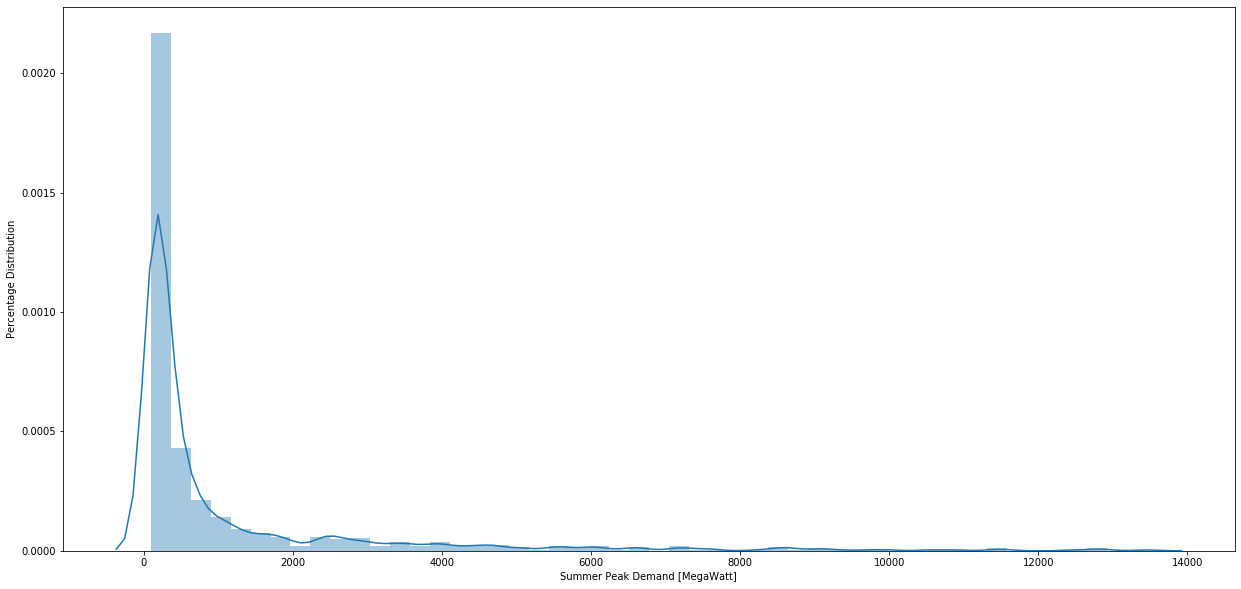

In [0]:
summer_df = power_summary_2018[(power_summary_2018['Summer Peak Demand'] != '.')]
summer_df = summer_df.assign(Summer_Peak_Demand_Trim = summer_df['Summer Peak Demand'].str.replace(",", "").astype(float))
plt.figure(figsize = (21,10))
sns.distplot(summer_df[(summer_df['Summer_Peak_Demand_Trim'] < 15000) & (summer_df['Summer_Peak_Demand_Trim'] > 100)]['Summer_Peak_Demand_Trim'])
plt.xlabel('Summer Peak Demand [MegaWatt]')
plt.ylabel('Percentage Distribution')
plt.show()